# Health Care Prediction on Diabetic Patients - Case Study



### Loading the required Library Packages

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC as SVM
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### Reading and exploring the Health Care Dataset

In [ ]:
data=pd.read_csv('health care diabetes.csv')
#List first 5 rec
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# Number of (rows and columns), elements, dimensions
data.shape, data.size, data.ndim

((768, 9), 6912, 2)

In [ ]:
# Information of the data set like , data type , memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Summary of stastical information of the data set
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
#checking the null values of the data set
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

<Figure size 1200x800 with 0 Axes>

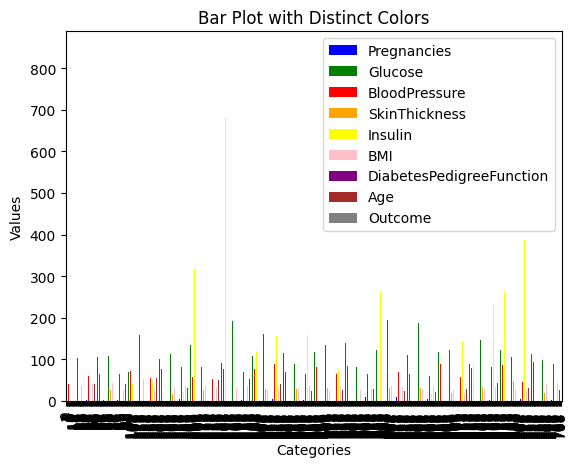

In [ ]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette("husl", len(data))
data.plot(kind='bar', color = ['blue', 'green','red','orange','yellow','pink','purple','brown','grey'])
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot with Distinct Colors')
plt.show()

###  Data Preprocessing: Treating the Missing Values

In this datasets 0 represents the null values, and hence we will replace 0 by mean of their feature (variable) columns.

In [ ]:
#Identifying the mean of the various features

print("Mean Value of Glucose Level is \t:",round(data['Glucose'].mean(),3))
print("Mean Value of Blood Pressure is :",round(data['BloodPressure'].mean(),3))
print("Mean Value of Skin Thickness is :",round(data['SkinThickness'].mean(),3))
print("Mean Value of insulin Level is \t:",round(data['Insulin'].mean(),3))

Mean Value of Glucose Level is 	: 120.895
Mean Value of Blood Pressure is : 69.105
Mean Value of Skin Thickness is : 20.536
Mean Value of insulin Level is 	: 79.799


In [ ]:
# Finding the number of rows which has 0 in various features indicating NULL values

print("NULL Values proportion in dataset for different Variables : \n")
print('Glucose\t\t-',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure\t-',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness\t-',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin\t\t-',len(data['Insulin'][data['Insulin']==0]))
print('BMI\t\t-',len(data['BMI'][data['BMI']==0]))

NULL Values proportion in dataset for different Variables : 

Glucose		- 5
BloodPressure	- 35
SkinThickness	- 227
Insulin		- 374
BMI		- 11


In [ ]:
# Finding the null value percentage
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']
null_percentage = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64


In [ ]:
# Replacing the null values with the mean
data['Glucose']=data['Glucose'].replace([0],[data['Glucose'].mean()])
data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])
data['BMI']=data['BMI'].replace([0],[data['BMI'].mean()])

In [ ]:
#Re-Checking and Display the null value percentage of the treated columns
null_percentage_treated = (data[selected_columns] == 0).mean() * 100
print("Percentage of Null Values for Each Column after the null value treatment:")
#For each selected column
print(null_percentage_treated)

Percentage of Null Values for Each Column after the null value treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
dtype: float64


### Detecting outliers and Treatment

In [ ]:
columns=data[selected_columns]

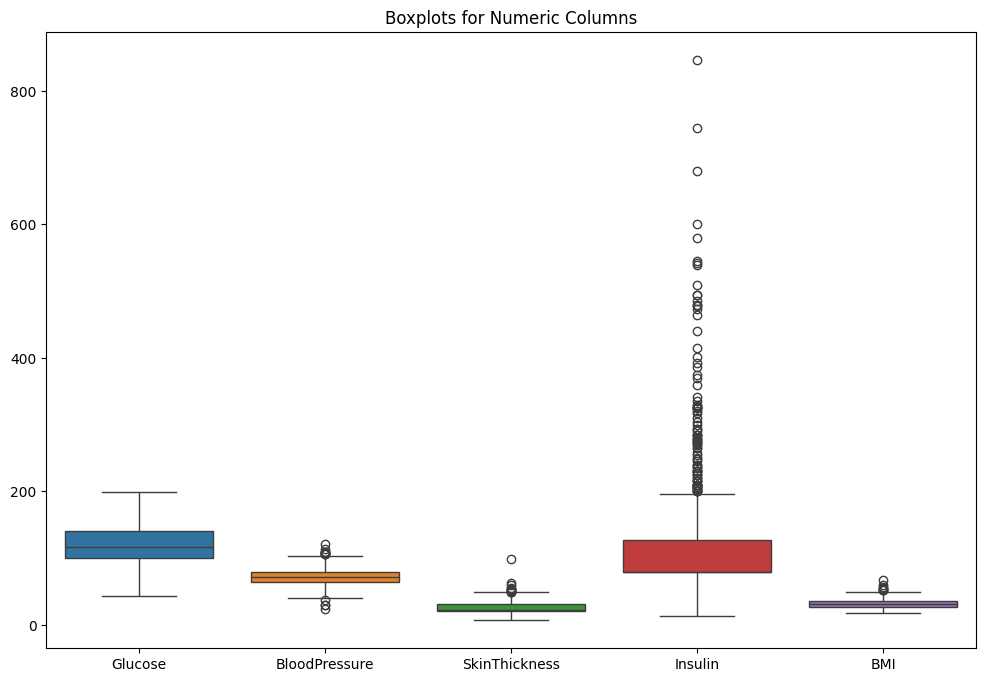

In [ ]:
# Display boxplots for numeric columns to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [ ]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
# Removes the rows that contains **NULL** values
# data=data.dropna()

In [ ]:
# Finding the Outlier Count in the selected Columns:
def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    # Count the number of outliers
    count_outliers = len(outliers)

    return count_outliers

# Calculate and print the number of outliers for each column of interest
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89
Number of outliers in the 'BMI' column: 8


## Outlier Treatment

Boxplot Analysis for Numerical Columns

In [ ]:
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.600000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [ ]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(688, 9)
(768, 9)


In [ ]:
data_cleared_iqr

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
5              5    116.0           74.0      20.536458   79.799479  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[688 rows x 9 columns]

Inferences from outlier removal

In [ ]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]
print(col)

     Glucose  BloodPressure  SkinThickness     Insulin
0      148.0           72.0      35.000000   79.799479
1       85.0           66.0      29.000000   79.799479
2      183.0           64.0      20.536458   79.799479
3       89.0           66.0      23.000000   94.000000
5      116.0           74.0      20.536458   79.799479
..       ...            ...            ...         ...
763    101.0           76.0      48.000000  180.000000
764    122.0           70.0      27.000000   79.799479
765    121.0           72.0      23.000000  112.000000
766    126.0           60.0      20.536458   79.799479
767     93.0           70.0      31.000000   79.799479

[688 rows x 4 columns]


## Chart

In [ ]:
def set_global_title(plot_titleR="Rashad", plot_titleL="Healthcare Prediction", plot_suptitle=""):
    plt.title(plot_titleR, loc="left", style="italic")
    plt.title(plot_titleL, loc="right", style="italic")
    plt.suptitle(plot_suptitle, fontsize=16, x=0.5, y=0.98)
    plt.show()

#### Box chart

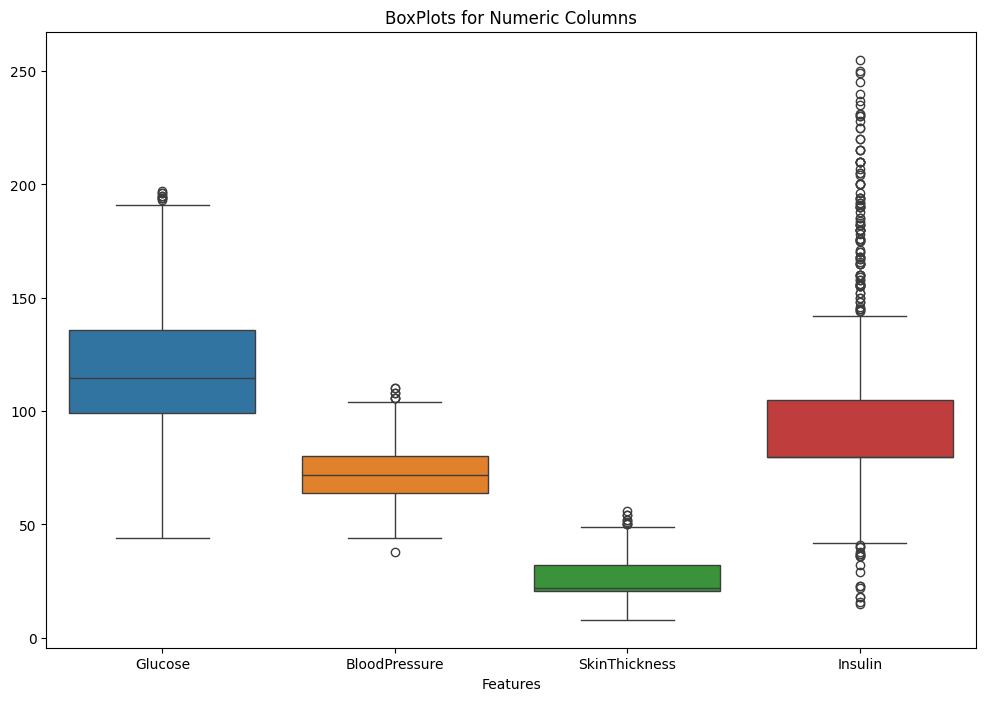

In [ ]:
# Checking the outliers after treatment using box plot
plt.figure(figsize=(12, 8))
ax=sns.boxplot(data=col)
ax.set(title='BoxPlots for Numeric Columns',xlabel='Features')
plt.show()

#### Line chart

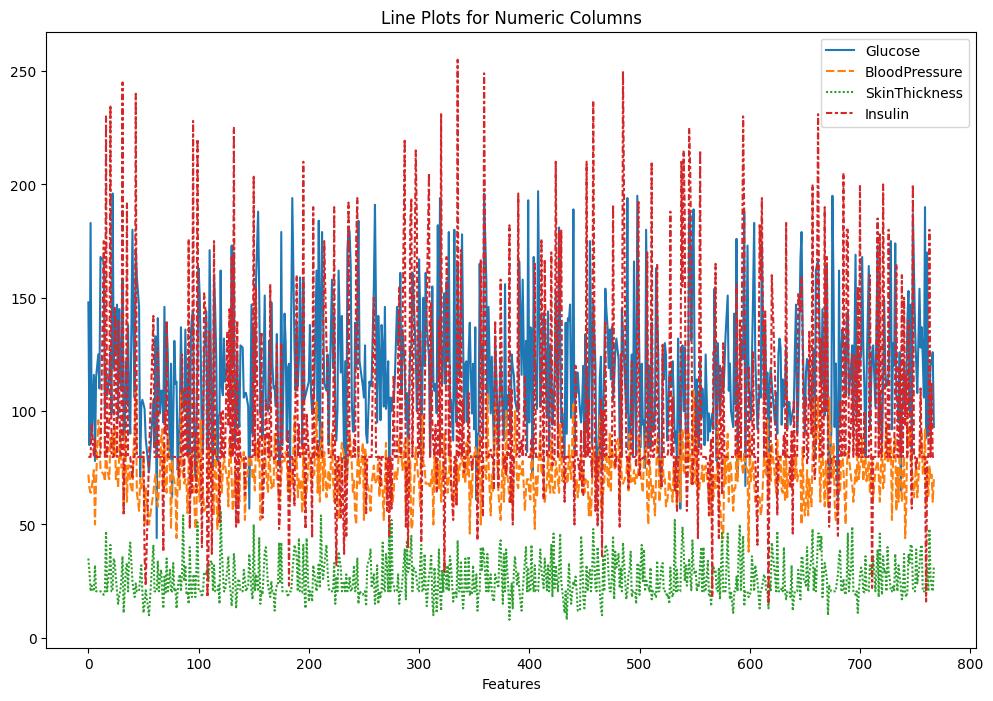

In [ ]:
plt.figure(figsize=(12, 8))
ax=sns.lineplot(data=col)
ax.set(title='Line Plots for Numeric Columns',xlabel='Features')
plt.show()

#### Bar chart

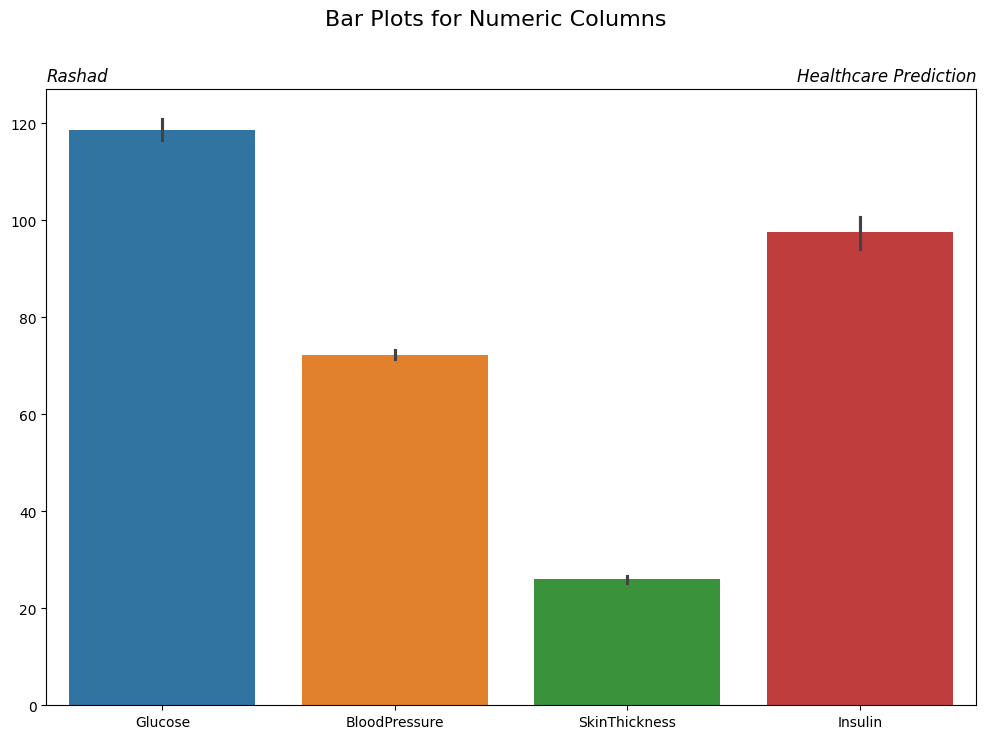

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=col)
set_global_title(plot_suptitle="Bar Plots for Numeric Columns")

### Violin Chart

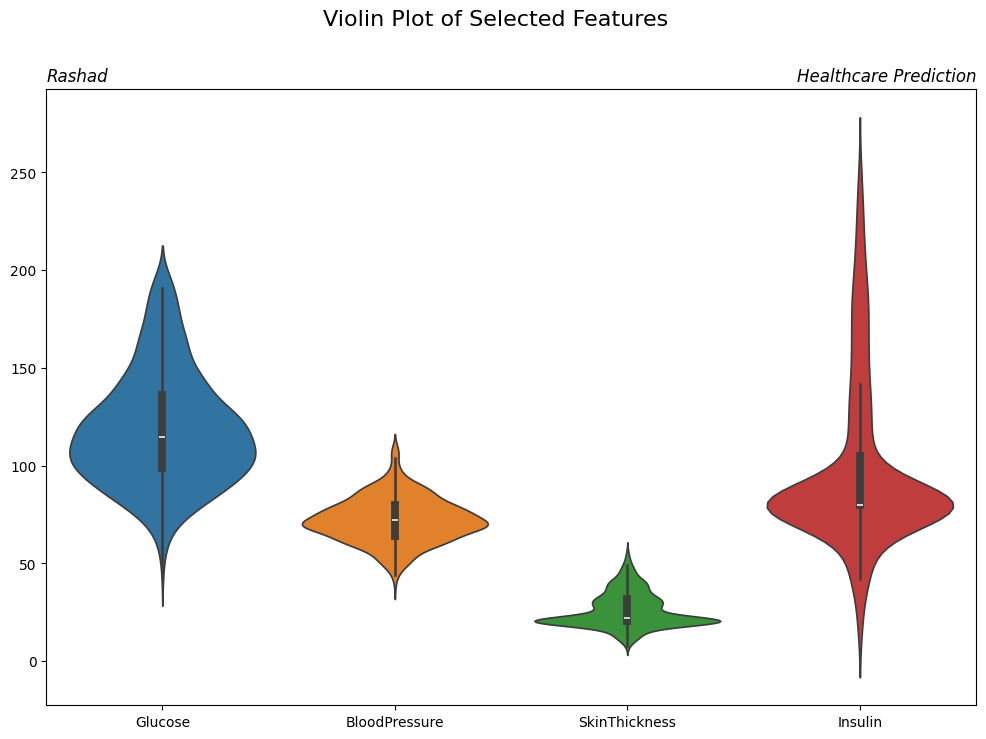

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(data=col)
set_global_title(plot_suptitle="Violin Plot of Selected Features")

### Pairplot Chart

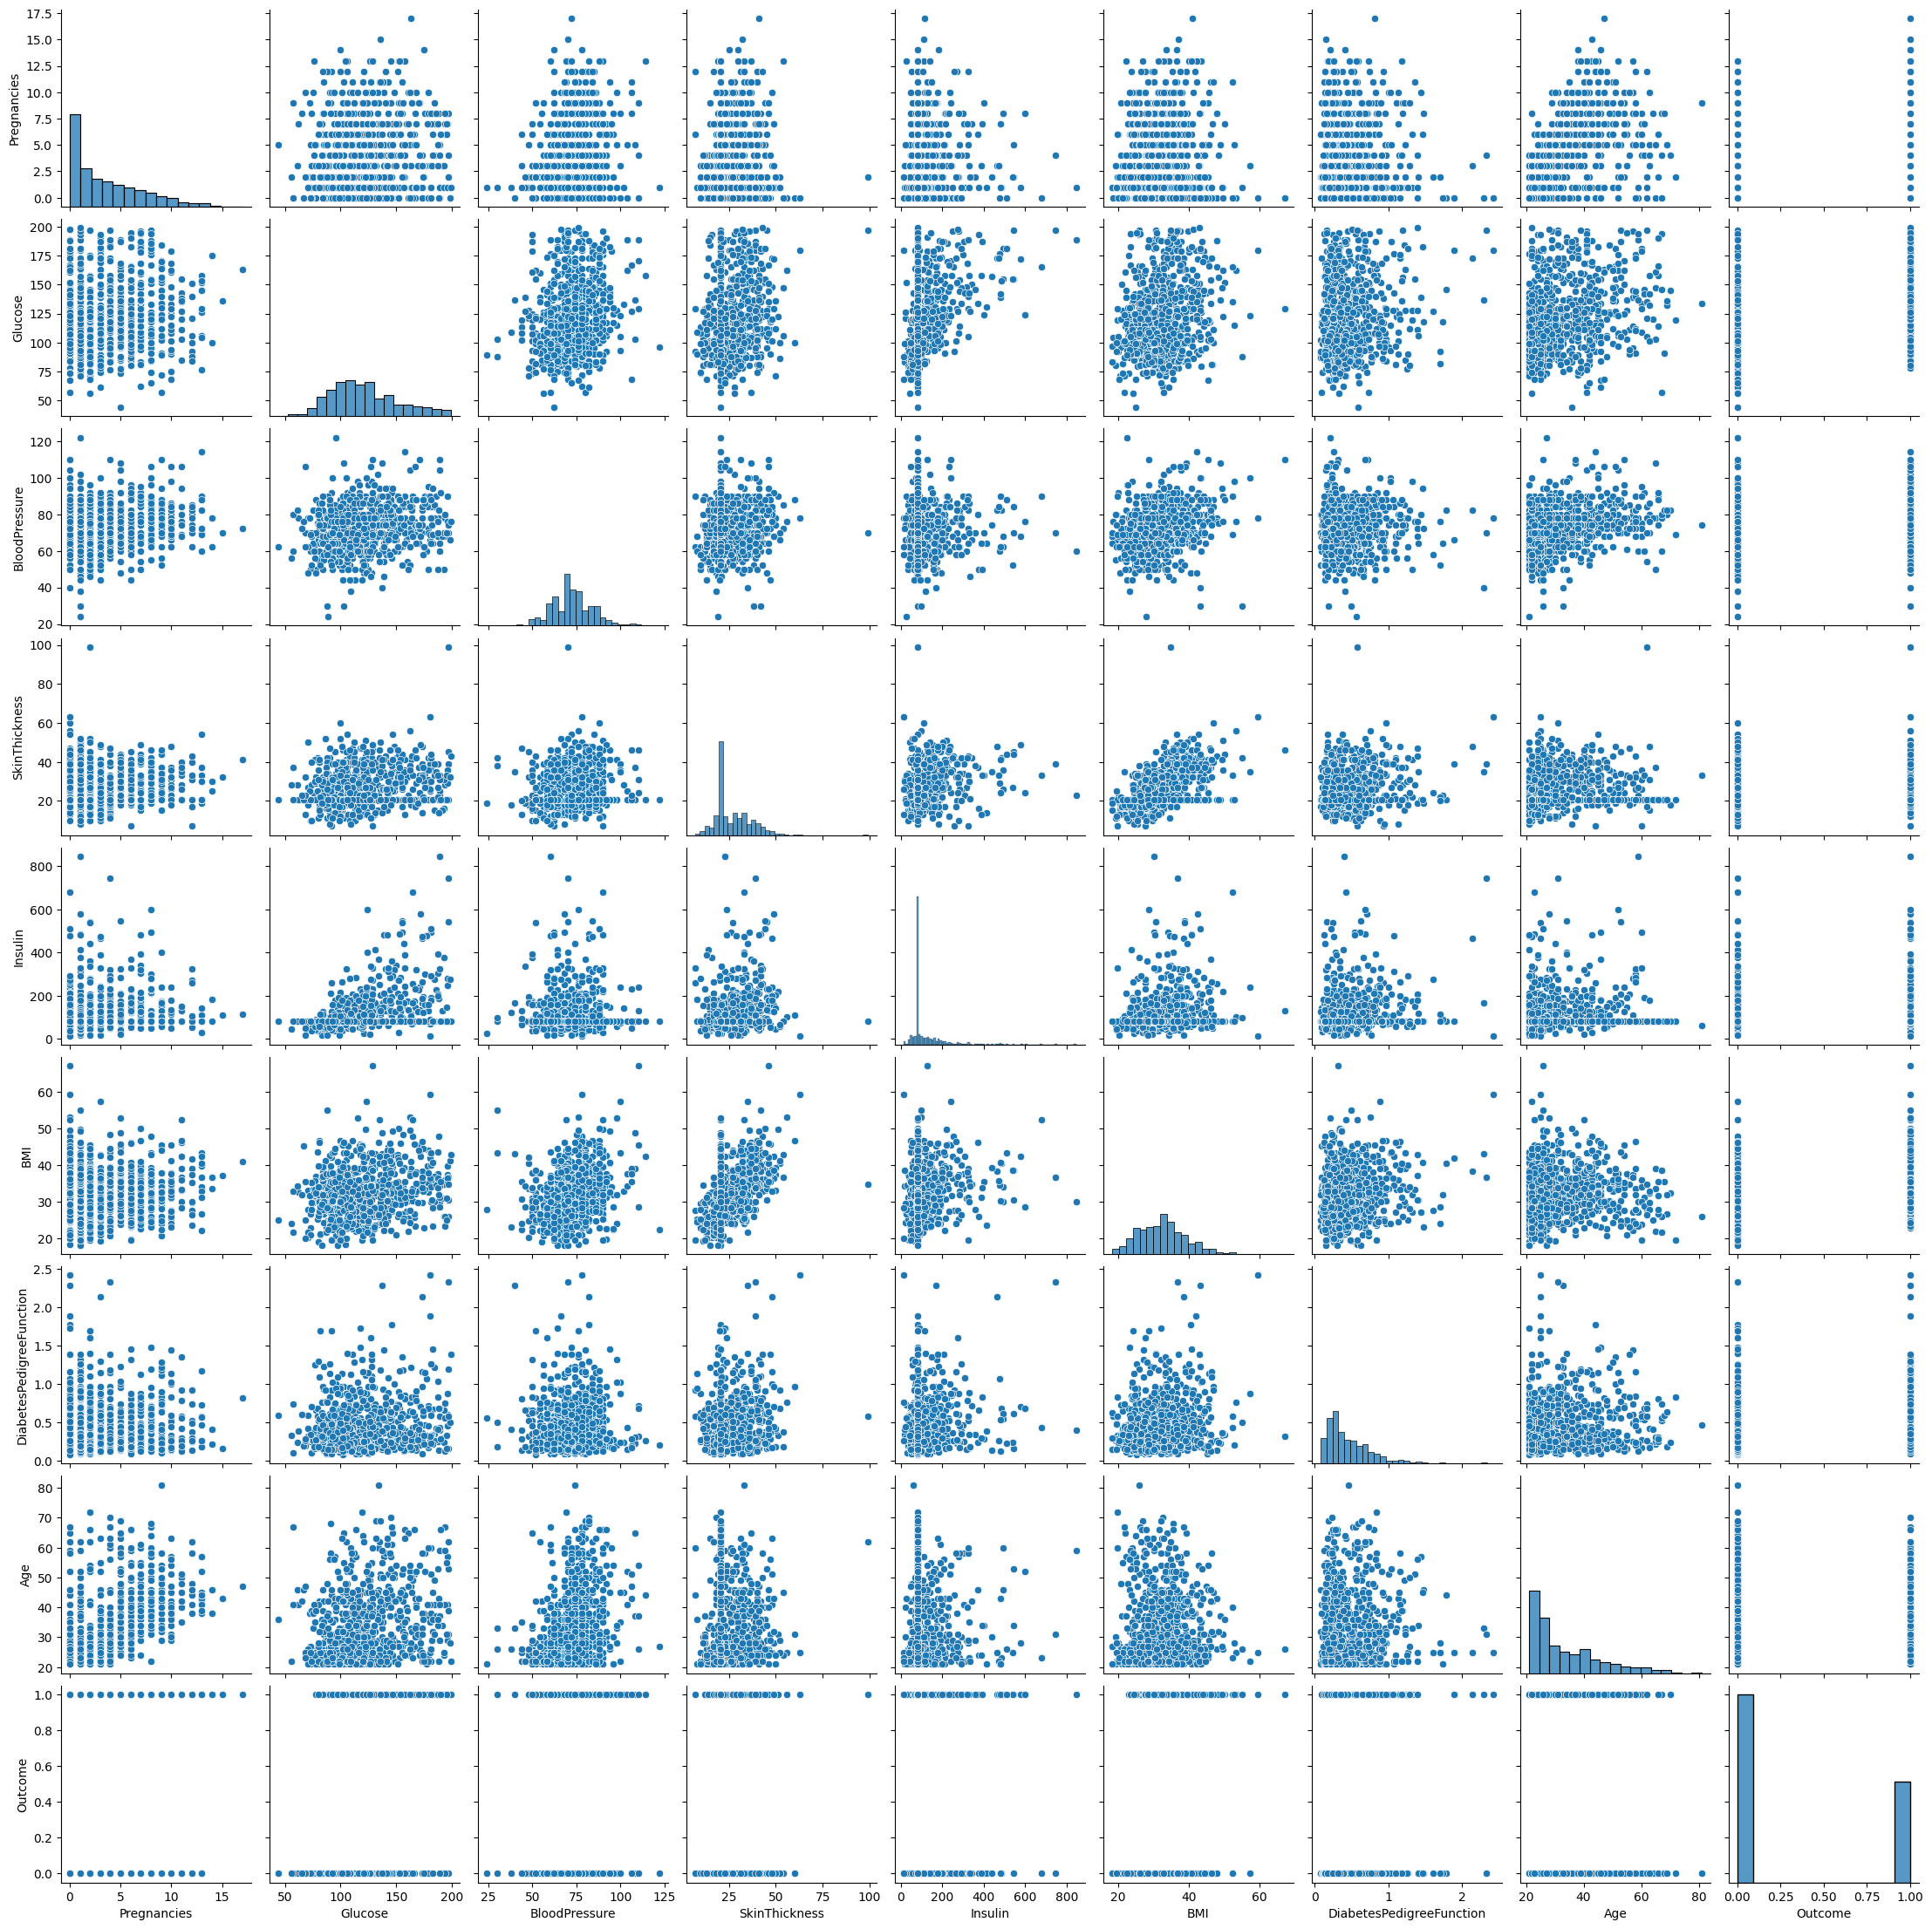

<Figure size 1200x800 with 0 Axes>

In [ ]:
sns.pairplot(data)
plt.figure(figsize=(12,8))
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

## Outliers are significantly reduced

In [ ]:
# Using different graph style for below graphs
data_cleared_iqr.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

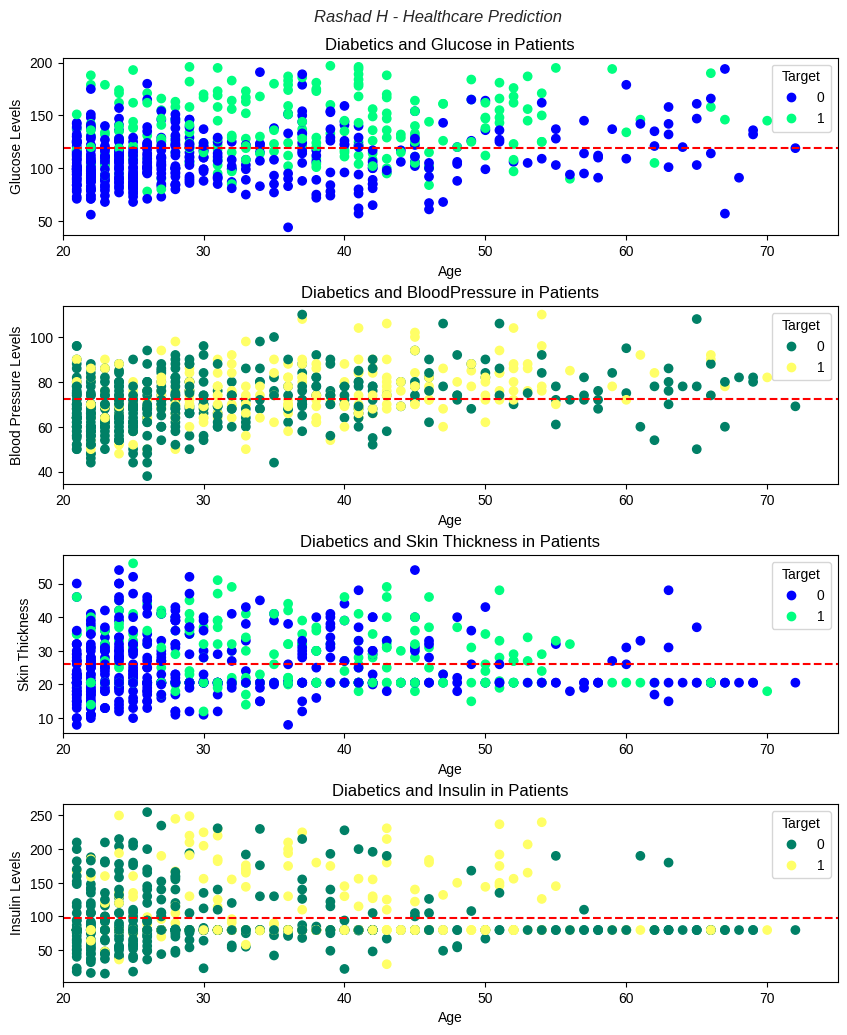

In [ ]:
import matplotlib.pyplot as plt

# Scatter Plots for Glucose, BloodPressure, Skin Thickness, Insulin
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=4, figsize=(10, 12))

# Scatter plot on Diabetics and Glucose in Patients
scatter0 = ax0.scatter(x=data_cleared_iqr['Age'], y=data_cleared_iqr['Glucose'], c=data_cleared_iqr['Outcome'], cmap='winter')
ax0.legend(*scatter0.legend_elements(), title='Target')
ax0.axhline(data_cleared_iqr['Glucose'].mean(), ls='--', c='red')
ax0.set(title='Diabetics and Glucose in Patients', xlabel='Age', ylabel='Glucose Levels')
ax0.set_xlim([20, 75])

# Scatter plot on Diabetics and BloodPressure in Patients
scatter1 = ax1.scatter(x=data_cleared_iqr['Age'], y=data_cleared_iqr['BloodPressure'], c=data_cleared_iqr['Outcome'], cmap='summer')
ax1.legend(*scatter1.legend_elements(), title='Target')
ax1.axhline(data_cleared_iqr['BloodPressure'].mean(), ls='--', c='red')
ax1.set(title='Diabetics and BloodPressure in Patients', xlabel='Age', ylabel='Blood Pressure Levels')
ax1.set_xlim([20, 75])

# Scatter plot on Diabetics and Skin Thickness in Patients
scatter2 = ax2.scatter(x=data_cleared_iqr['Age'], y=data_cleared_iqr['SkinThickness'], c=data_cleared_iqr['Outcome'], cmap='winter')
ax2.legend(*scatter2.legend_elements(), title='Target')
ax2.axhline(data_cleared_iqr['SkinThickness'].mean(), ls='--', c='red')
ax2.set(title='Diabetics and Skin Thickness in Patients', xlabel='Age', ylabel='Skin Thickness')
ax2.set_xlim([20, 75])

# Scatter plot on Diabetics and Insulin in Patients
scatter3 = ax3.scatter(x=data_cleared_iqr['Age'], y=data_cleared_iqr['Insulin'], c=data_cleared_iqr['Outcome'], cmap='summer')
ax3.legend(*scatter3.legend_elements(), title='Target')
ax3.axhline(data_cleared_iqr['Insulin'].mean(), ls='--', c='red')
ax3.set(title='Diabetics and Insulin in Patients', xlabel='Age', ylabel='Insulin Levels')
ax3.set_xlim([20, 75])

# Global plot settings for consistency
plt.style.use('seaborn-v0_8-whitegrid')
plt.suptitle("Rashad H - Healthcare Prediction", fontsize=12, style='italic', x=0.5, y=0.92)
plt.subplots_adjust(hspace=0.4)
# Display the plots
plt.show()


## EDA - Univariate analysis for each feature

### Exploring variables using histograms (kind='hist')

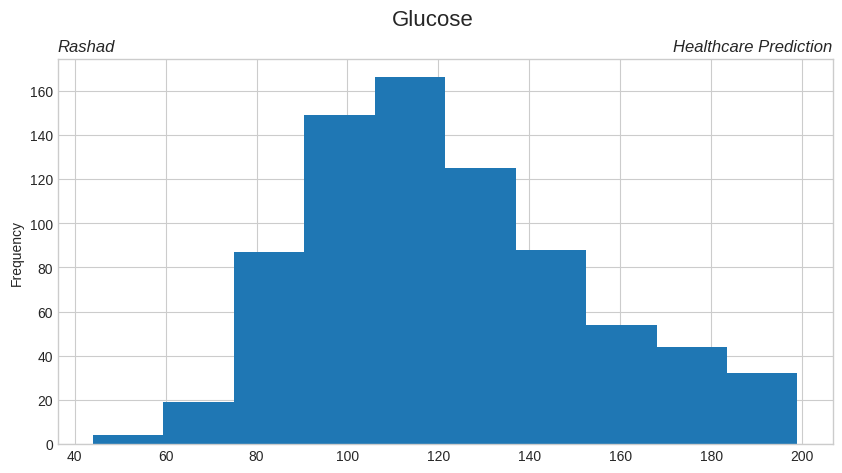

In [ ]:
data['Glucose'].plot(kind='hist',figsize=(10,5))
set_global_title(plot_suptitle="Glucose")

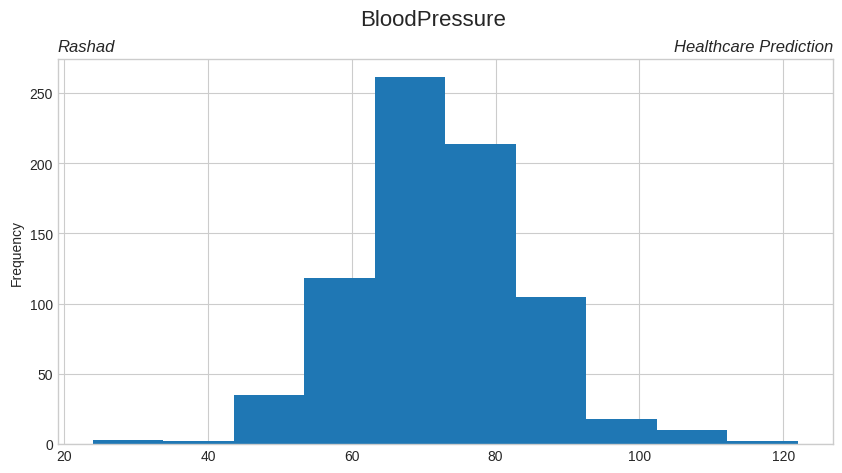

In [ ]:
data['BloodPressure'].plot(kind='hist',figsize=(10,5))
set_global_title(plot_suptitle="BloodPressure")

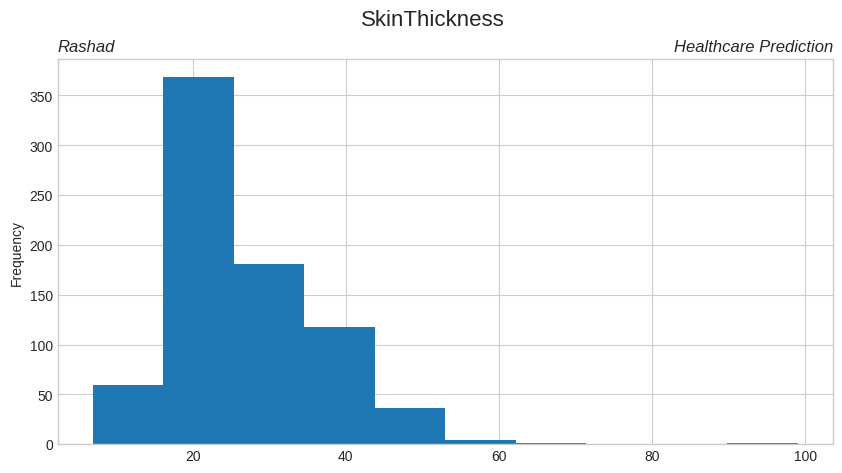

In [ ]:
data['SkinThickness'].plot(kind='hist',figsize=(10,5),)
set_global_title(plot_suptitle="SkinThickness")

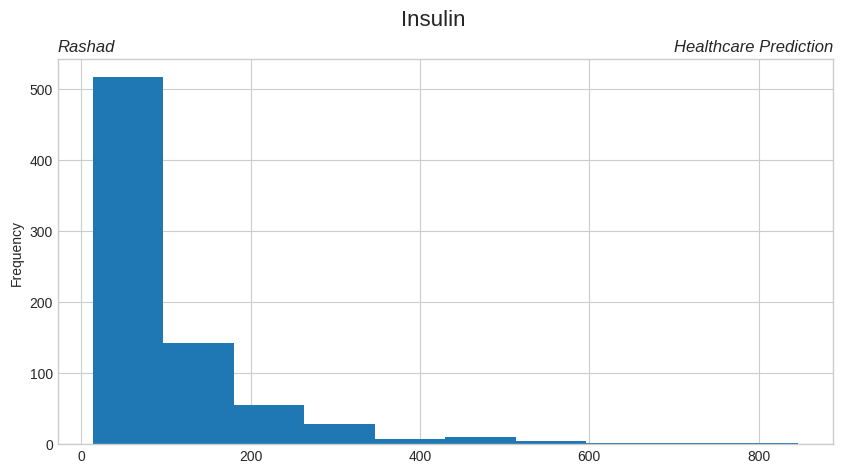

In [ ]:
data['Insulin'].plot(kind='hist',figsize=(10,5))
set_global_title(plot_suptitle="Insulin")

### Violin plot for the selected features

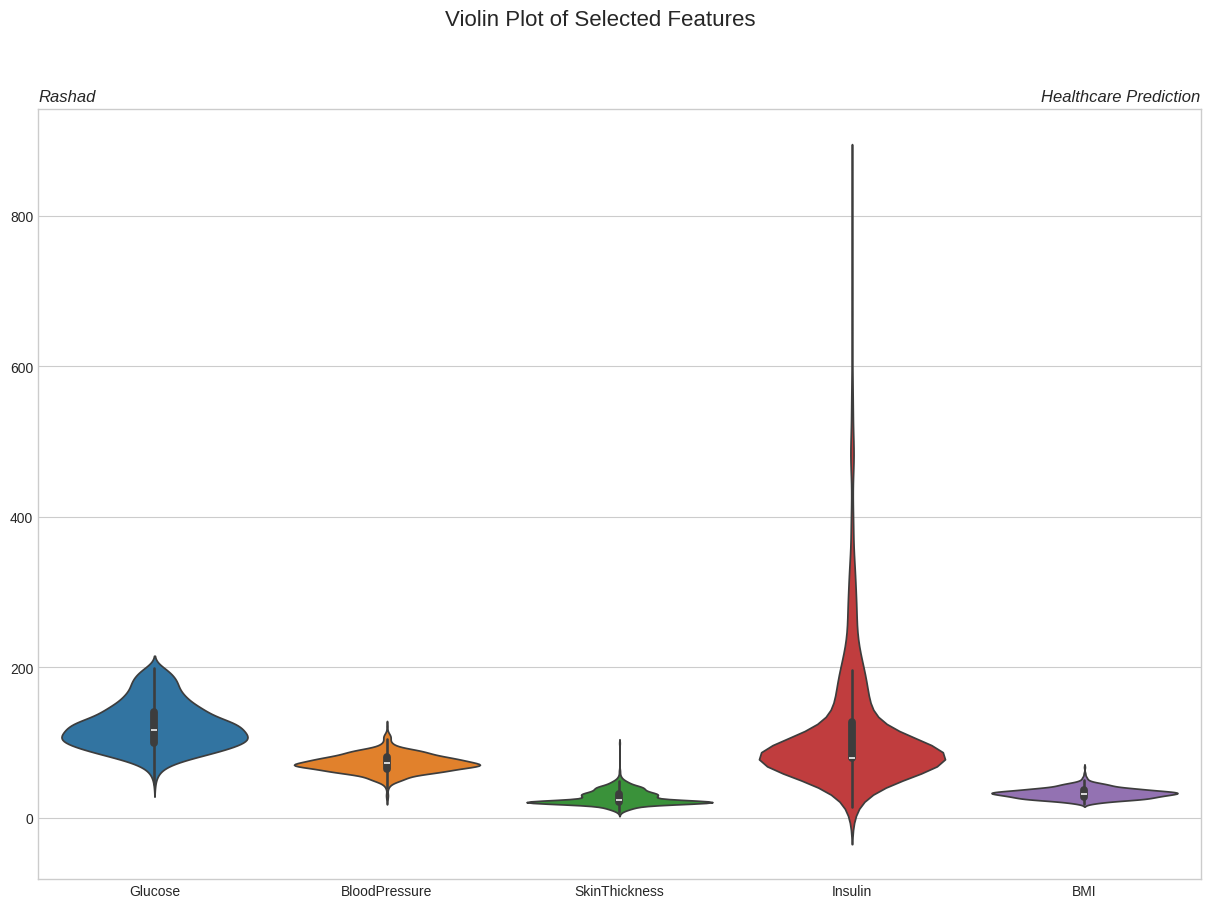

In [ ]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=data[selected_columns])
set_global_title(plot_suptitle="Violin Plot of Selected Features")

#### The violin plot shows the distribution of four numerical features: Glucose, BloodPressure, Skin Thickness, and Insulin. The violin shape represents the probability density function (PDF) of each feature, and the box plot embedded within each violin plot shows the median, interquartile range (IQR), and outliers.

###  Kernel Density Estimation (KDE) plot for the selected features

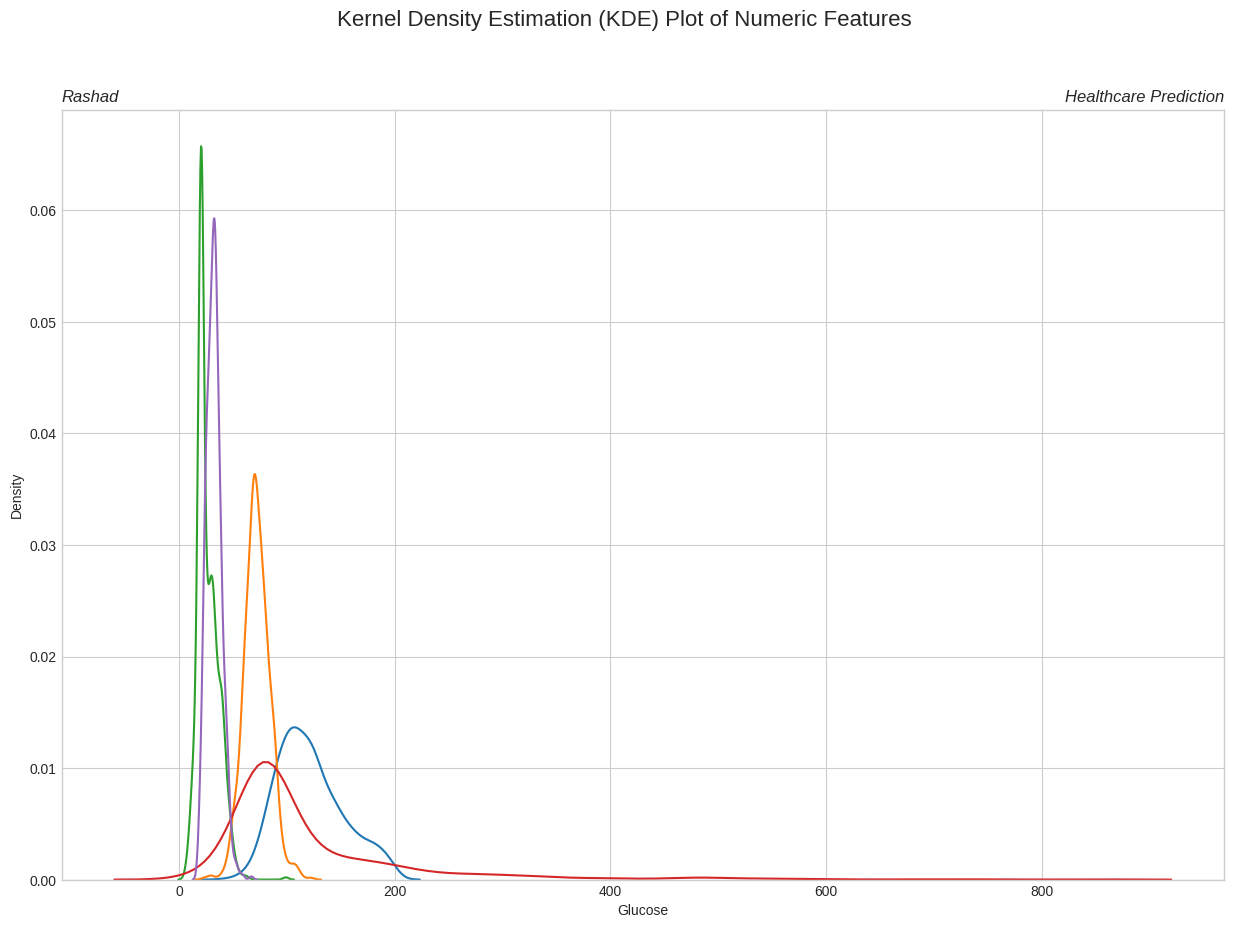

In [ ]:
plt.figure(figsize=(15, 10))
for column in selected_columns:
    sns.kdeplot(data[column], label=column)
set_global_title(plot_suptitle="Kernel Density Estimation (KDE) Plot of Numeric Features")

#### The image shows a Kernel Density Estimation (KDE) plot of four numerical features: Glucose, BloodPressure, Skin Thickness, and Insulin. KDE is a non-parametric method for estimating the probability density function (PDF) of a random variable. The KDE plot shows the estimated PDF of each feature, which can be used to visualize the distribution of the data.



###  Creating a count (frequency) plot describing the data types and the count of variables.

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data.dtypes.value_counts()

float64    6
int64      3
Name: count, dtype: int64

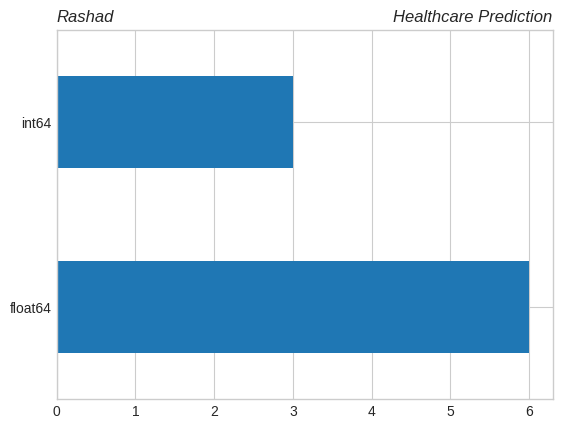

In [ ]:
#Bar Chart horizontal representation
figsize=(16,2)
data.dtypes.value_counts().plot(kind='barh')
set_global_title()

#### It can be Observed that there are **[integer data → 3 features]** and **[float data → 6 features]**

## Data Exploration:

### Balance of the data by plotting the count of outcomes by their value.

In [ ]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

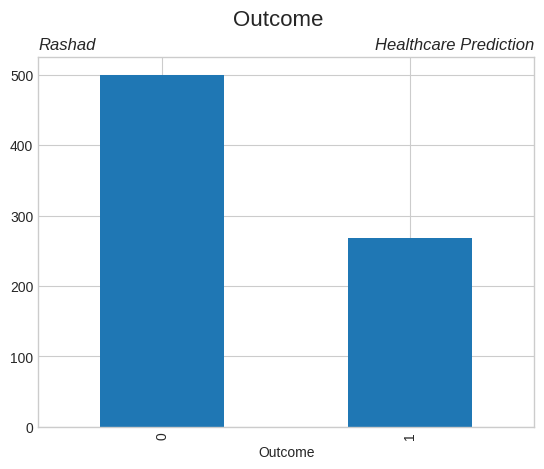

In [ ]:
data['Outcome'].value_counts().plot(kind='bar')
set_global_title(plot_suptitle="Outcome")

In [ ]:
outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
outcome

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

### Inferences from Outcome Distribution
<!--
1. **Class Imbalance:**
   - The dataset exhibits class imbalance in the 'Outcome' variable.
   - Class 0 has 500 instances. (No Diabetes)
   - Class 1 has 268 instances. (Diabetes)

2. **Potential Impact on Modeling:**
   - Class imbalances may affect the performance of machine learning models, particularly for binary classification tasks.
   - Addressing class imbalance through techniques like resampling or using appropriate evaluation metrics may be necessary.

3. **Consideration for Predictive Models:**
   - Models may need to be evaluated and tuned considering the imbalanced distribution to avoid biased predictions toward the majority class. -->

In [ ]:
balanced_data=100-outcome
balanced_data

Outcome
0    34.895833
1    65.104167
Name: count, dtype: float64

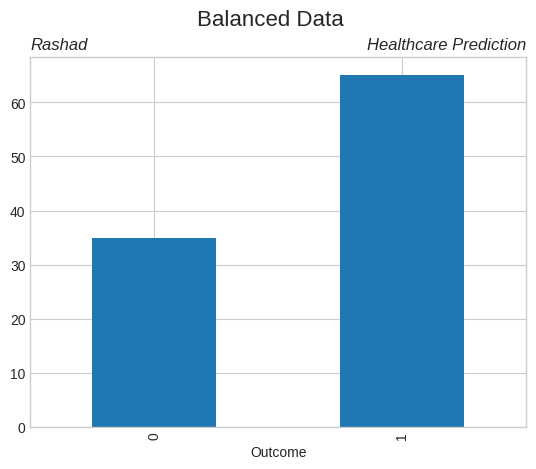

In [ ]:
balanced_data.plot(kind='bar')
set_global_title(plot_suptitle="Balanced Data")

###  Findings and plan future course of action.

 - We can see It's a Imbalance dataset,This shows that a dataset is biased towards a class(0) in the dataset. If the dataset is biased towards one class, an algorithm trained on the same data will be biased towards the same class,so first we have to balance it.
 - We can use Resampling or SMOTE to balance a dataset.

###  Scatter charts between the pair of variables to understand the relationships.

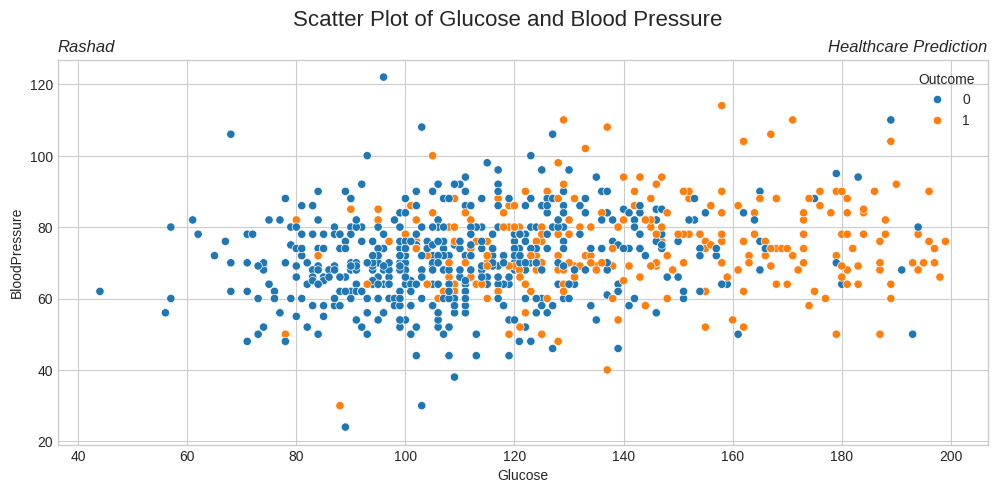

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
set_global_title(plot_suptitle="Scatter Plot of Glucose and Blood Pressure")

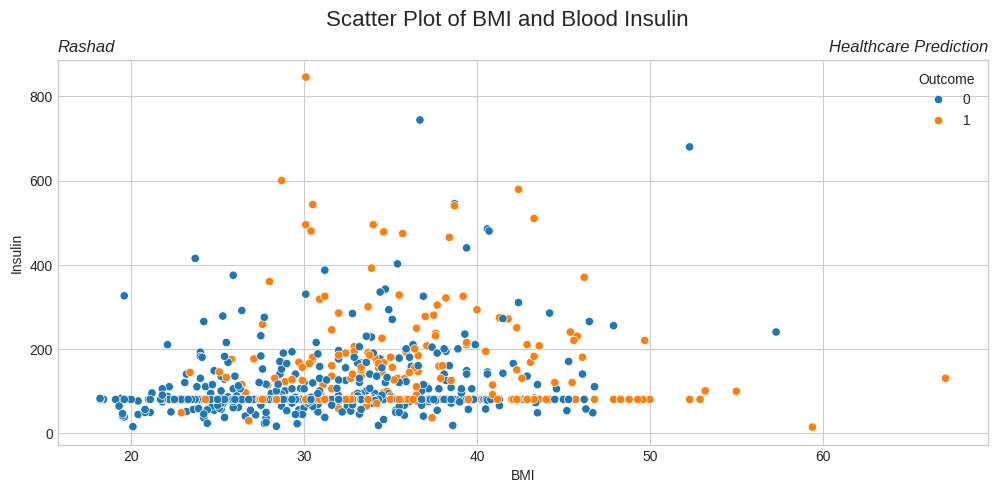

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=data)
set_global_title(plot_suptitle="Scatter Plot of BMI and Blood Insulin")

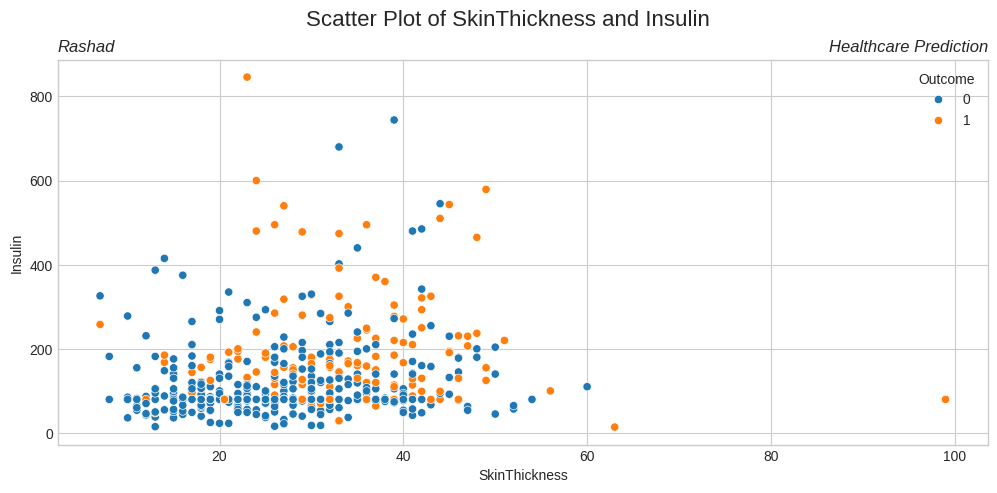

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=data)
set_global_title(plot_suptitle="Scatter Plot of SkinThickness and Insulin")

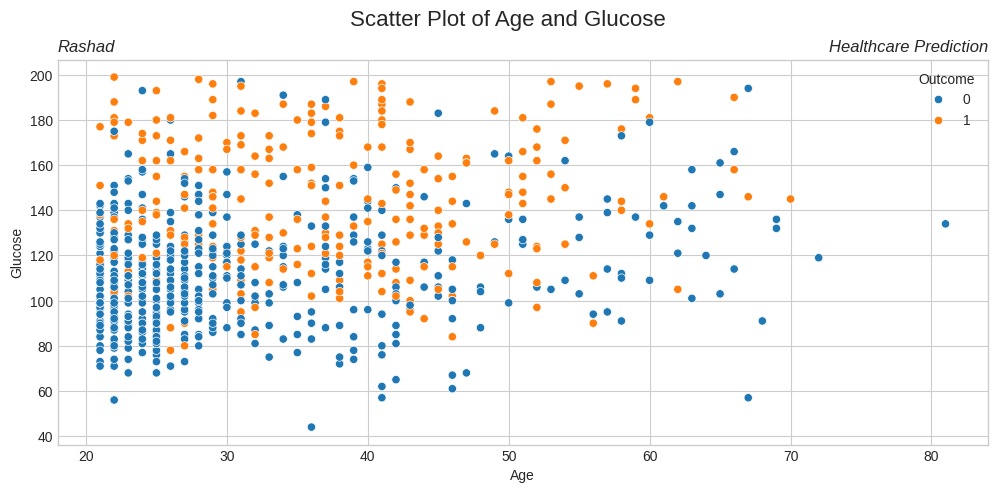

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=data)
set_global_title(plot_suptitle="Scatter Plot of Age and Glucose")

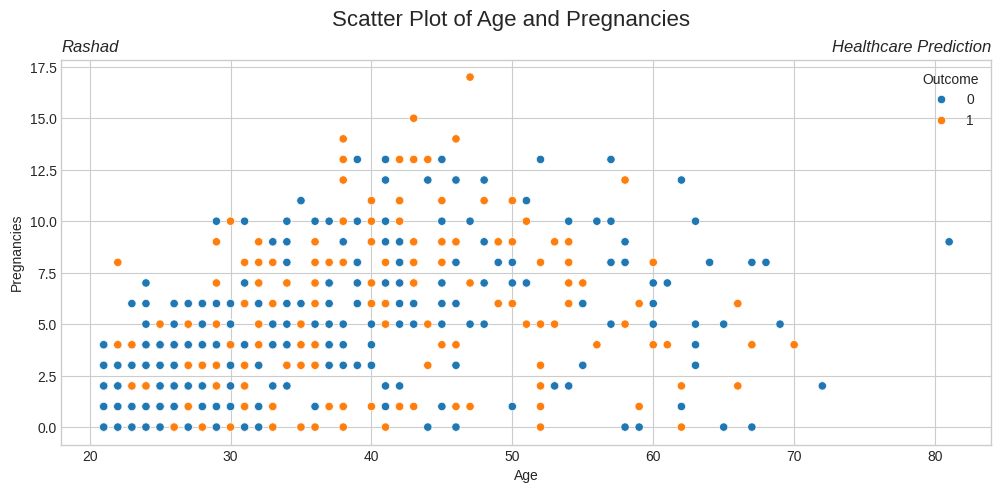

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Pregnancies', hue='Outcome',data=data)
set_global_title(plot_suptitle="Scatter Plot of Age and Pregnancies")


- We can see Pregnancies has highest relation with Age feature.
- Also, Outcome has maximum relation with Glucose and minimum with Blood Presure than the other features.

- We can see from scatter plot, that there is ouliers present in this data.
- Because of outliers, our data is skewed to left or right side, which is not acceptable.
- If we want to train a model, this poses a problem.
- Therefore, for better visualization and outlier detection, we can use sns.boxplot and remove outliers from the dataset.

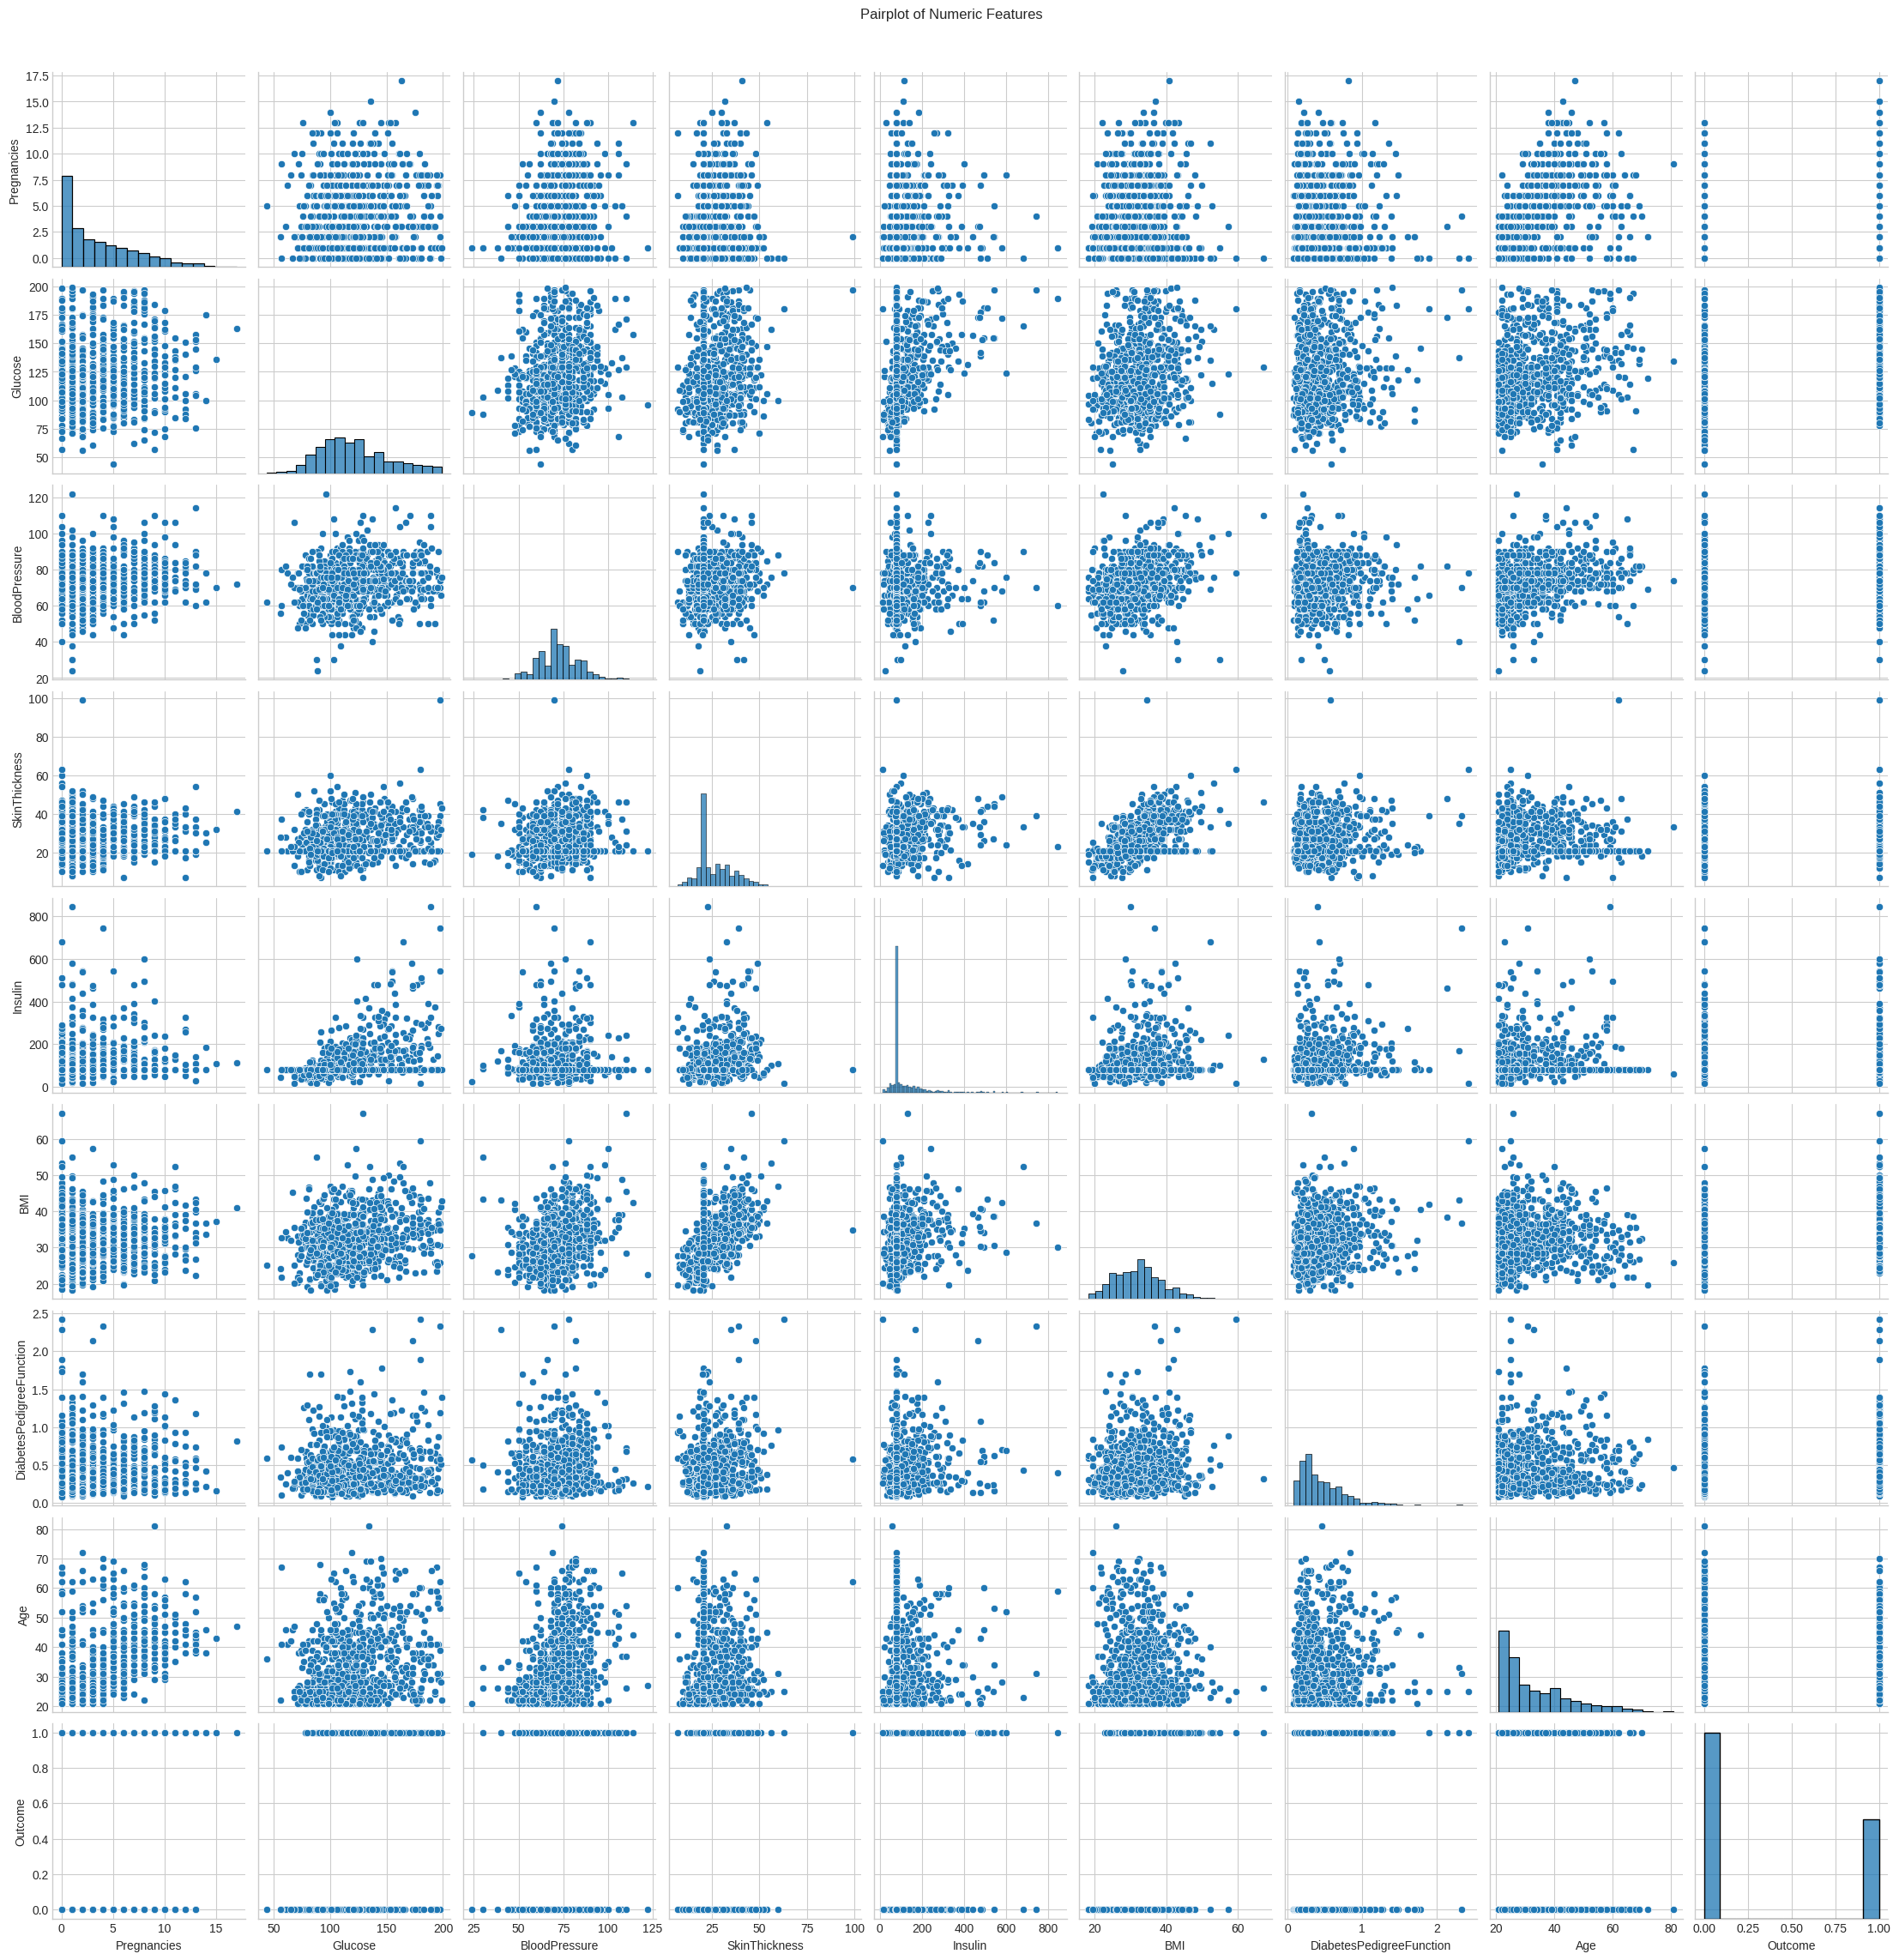

In [ ]:
sns.pairplot(data)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

### Multi-Variate Analysis

### Correlation analysis using a heat map.

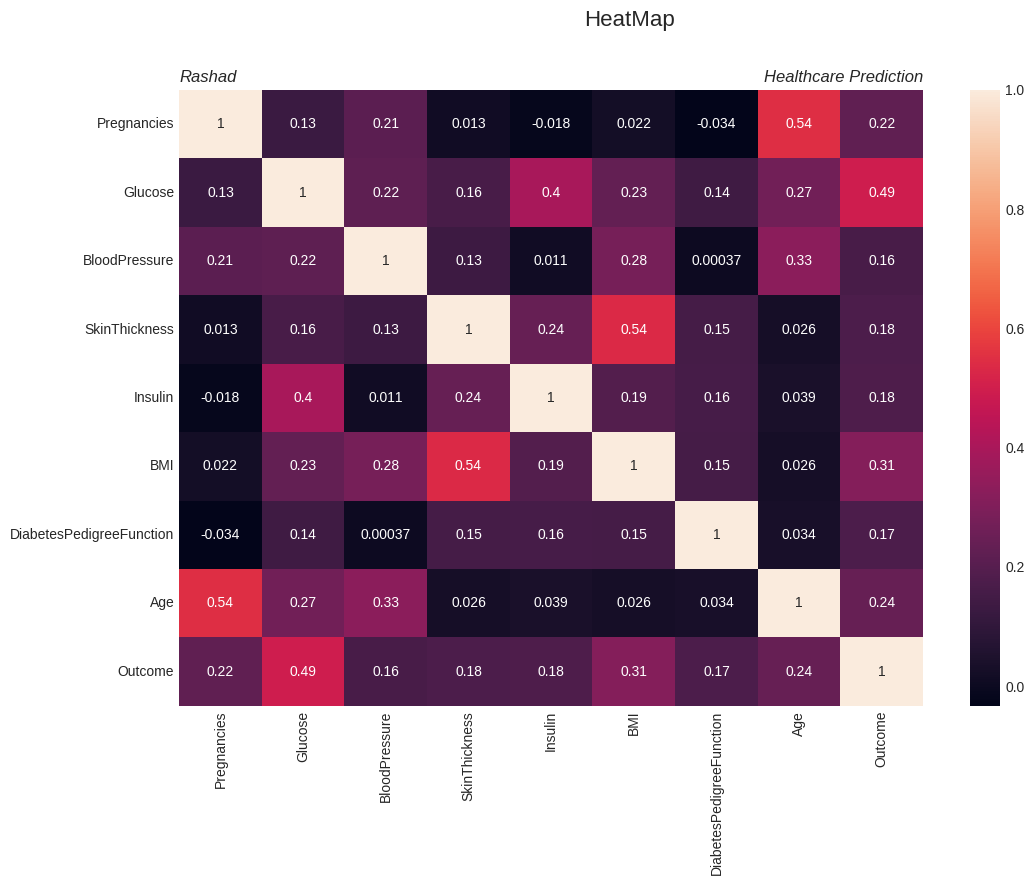

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
set_global_title(plot_suptitle="HeatMap")
plt.show()

#### Outcome → Max=Glucose, Min=BloodPressure

### Data Modeling

In [ ]:
x=data.drop(['Outcome'],axis=1)
y=data.Outcome
data.corrwith(data['Outcome'])

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.312254
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.937867
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


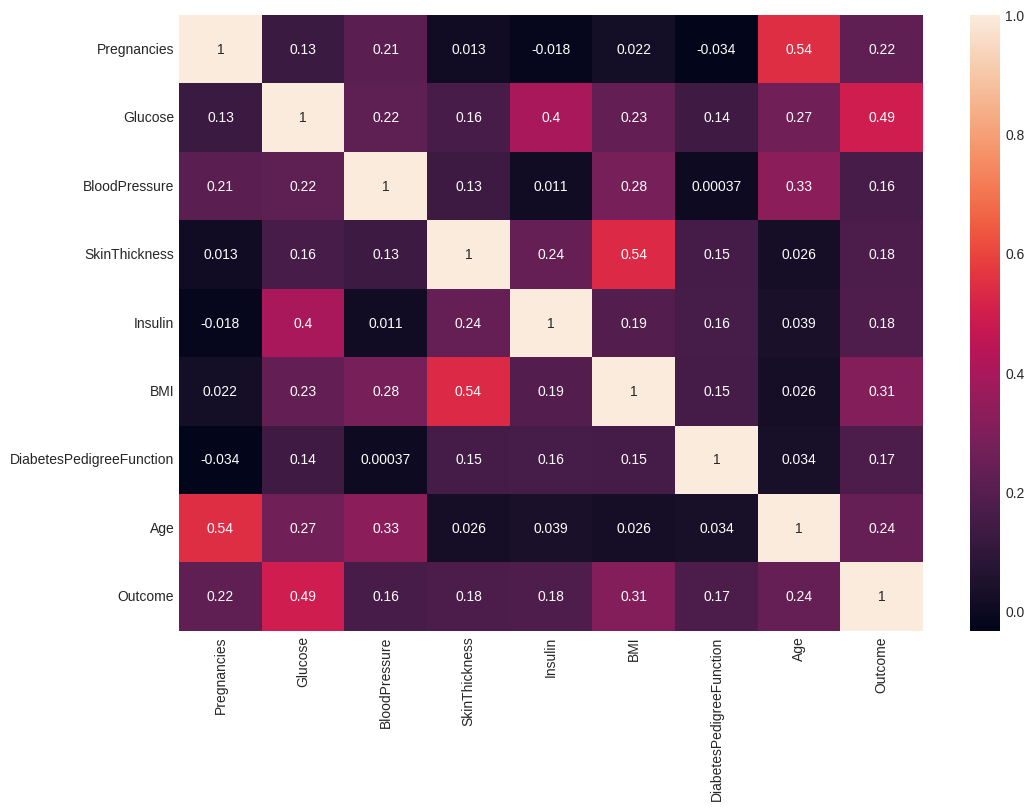

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

[0.10468843 0.24384624 0.0954181  0.08705463 0.07953281 0.13807623
 0.11432083 0.13706272]


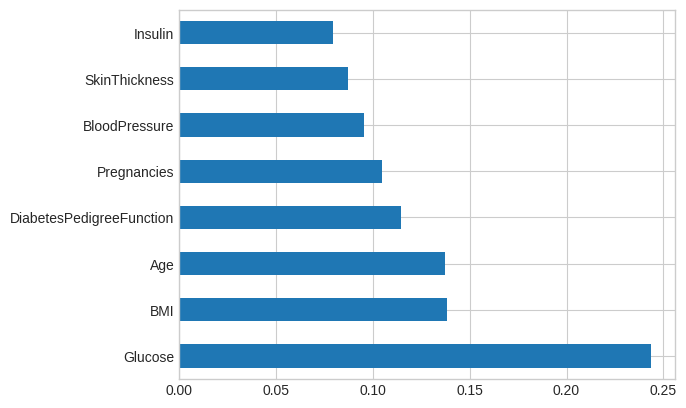

In [ ]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #using inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [148]:
new_x=data.drop(['Outcome','BloodPressure'],axis=1).values
new_y=data.Outcome.values

### Train-Test Split for Data Modeling

In [ ]:
pip install imbalanced-learn

In [ ]:
trainx,testx,trainy,testy=train_test_split(new_x,new_y,test_size=0.20,random_state=10)

print("Before OverSampling, counts of label '1': {}".format(sum(trainy == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainy == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =63)
trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel())
print('After OverSampling, the shape of train_X: {}'.format(trainx_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(trainy_res.shape))


print("After OverSampling, counts of label '1': {}".format(sum(trainy_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainy_res == 0)))

Before OverSampling, counts of label '1': 209
Before OverSampling, counts of label '0': 405 

After OverSampling, the shape of train_X: (810, 7)
After OverSampling, the shape of train_y: (810,) 

After OverSampling, counts of label '1': 405
After OverSampling, counts of label '0': 405


## Models

### Import Library (Receiver Operating Characteristics Curve)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings

### 1. LogisticRegression

Accuracy_score - 0.7207792207792207
Mean_squared_error - 0.2792207792207792 

Confusion_Matrix
 [[69 26]
 [17 42]]
Classification_report               precision    recall  f1-score   support

           0       0.80      0.73      0.76        95
           1       0.62      0.71      0.66        59

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.72      0.72       154

AUC: 0.839


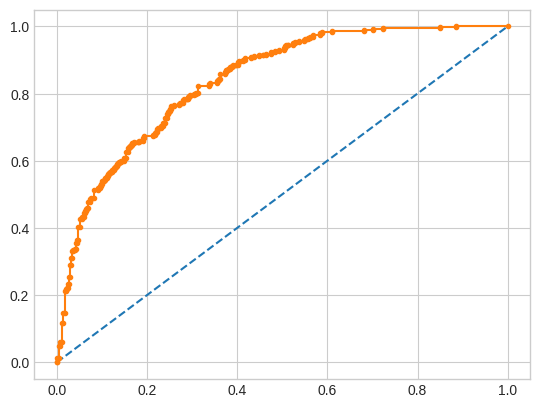

In [ ]:
logreg=LogisticRegression(solver='liblinear',random_state=123)
logreg.fit(trainx_res,trainy_res)

prediction=logreg.predict(testx)

print('Accuracy_score -',accuracy_score(testy,prediction))
print('Mean_squared_error -',mean_squared_error(testy,prediction), '\n')
print('Confusion_Matrix\n',confusion_matrix(testy,prediction))
print('Classification_report',classification_report(testy,prediction))

#Preparing ROC Curve upon LogisticRegression (Receiver Operating Characteristics Curve)
probs = logreg.predict_proba(trainx_res)
probs = probs[:, 1]
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 2. Random Forest

#### 2.1 RandomForest

Accuracy_score - 0.7597402597402597
Mean_squared_error - 0.24025974025974026
Confusion Matrix -
 [[71 24]
 [13 46]]

Classification_report -
               precision    recall  f1-score   support

           0       0.85      0.75      0.79        95
           1       0.66      0.78      0.71        59

    accuracy                           0.76       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154

AUC: 0.939


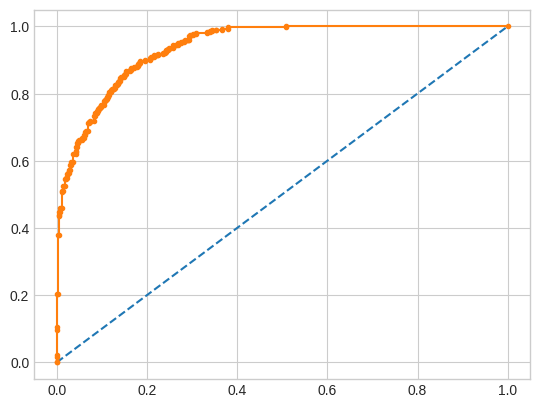

In [ ]:
rf=RandomForestClassifier(random_state=42,max_depth=5)
rf.fit(trainx_res,trainy_res)

rf_predict=rf.predict(testx)
print('Accuracy_score -',accuracy_score(testy,rf_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_predict))
print('Confusion Matrix -\n',(confusion_matrix(testy,rf_predict)))
print('\nClassification_report -\n',(classification_report(testy,rf_predict)))

#Preparing ROC Curve upon LogisticRegression (Receiver Operating Characteristics Curve)
probs = rf.predict_proba(trainx_res)
probs = probs[:, 1]
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### 2.2 RandomForest with Hyper Parameter Tuning

Accuracy_score - 0.7337662337662337
Mean_squared_error - 0.2662337662337662
Confusion Matrix -
 [[65 30]
 [11 48]]

Classification_report -
               precision    recall  f1-score   support

           0       0.86      0.68      0.76        95
           1       0.62      0.81      0.70        59

    accuracy                           0.73       154
   macro avg       0.74      0.75      0.73       154
weighted avg       0.76      0.73      0.74       154

AUC: 0.839


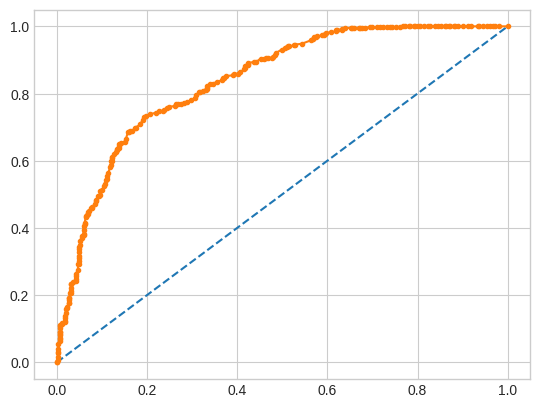

In [ ]:
#hyper parameter used
rf_grid=RandomForestClassifier(criterion= 'gini',max_depth= 2,max_leaf_nodes=3,max_samples=4,min_samples_leaf= 1,min_samples_split=3, n_estimators= 400,random_state=42)
rf_grid.fit(trainx_res,trainy_res)

rf_grid_predict=rf_grid.predict(testx)

print('Accuracy_score -',accuracy_score(testy,rf_grid_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_grid_predict))
print('Confusion Matrix -\n',(confusion_matrix(testy,rf_grid_predict)))
print('\nClassification_report -\n',(classification_report(testy,rf_grid_predict)))

probs = rf_grid.predict_proba(trainx_res)
probs = probs[:, 1]
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 3. DecisionTree

#### 3.1. DecisionTree

Accuracy_score - 0.6233766233766234
Mean_squared_error - 0.37662337662337664
Confusion Matrix -
 [[64 31]
 [27 32]]

Classification_report -
               precision    recall  f1-score   support

           0       0.70      0.67      0.69        95
           1       0.51      0.54      0.52        59

    accuracy                           0.62       154
   macro avg       0.61      0.61      0.61       154
weighted avg       0.63      0.62      0.63       154

AUC: 1.000


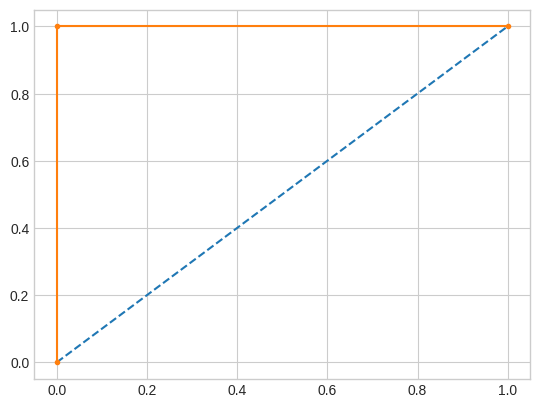

In [96]:
dc=DecisionTreeClassifier(random_state=42)
dc.fit(trainx_res,trainy_res)

dc_pred=dc.predict(testx)
print('Accuracy_score -',accuracy_score(testy,dc_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_pred))
print('Confusion Matrix -\n',(confusion_matrix(testy,dc_pred)))
print('\nClassification_report -\n',(classification_report(testy,dc_pred)))

probs = dc.predict_proba(trainx_res)
probs = probs[:, 1]
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### 3.2 DecisionTree with Hyper Parameter Tuning

In [97]:
dc_param_grid={'splitter':["best", "random"],'criterion':['gini','entropy'],'max_depth':[1,2,3], 'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]}

warnings.filterwarnings('ignore')
dc_grid=GridSearchCV(estimator=dc,param_grid=dc_param_grid,n_jobs=-1,cv=5,verbose=2)
dc_grid.fit(trainx_res,trainy_res)

print('Best params: ', dc_grid.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params:  {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


Accuracy_score - 0.6883116883116883
Mean_squared_error - 0.3116883116883117
Confusion Matrix -
 [[73 22]
 [26 33]]

Classification_report -
               precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.60      0.56      0.58        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.68      0.69      0.69       154

AUC: 0.758


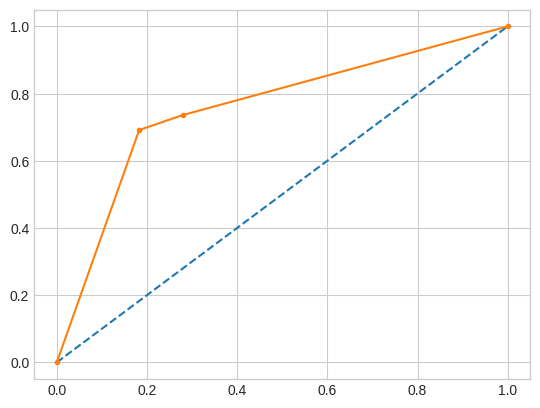

In [102]:
dc_final=DecisionTreeClassifier(criterion='gini', max_depth=2, max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=2, splitter='best', random_state=42)
dc_final.fit(trainx_res,trainy_res)
dc_final_pred=dc_final.predict(testx)

print('Accuracy_score -',accuracy_score(testy,dc_final_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_final_pred))
print('Confusion Matrix -\n',(confusion_matrix(testy,dc_final_pred)))
print('\nClassification_report -\n',(classification_report(testy,dc_final_pred)))

probs = dc_final.predict_proba(trainx_res)
probs = probs[:, 1]
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 4. SVM

#### 4.1. SVM

Accuracy_score - 0.7467532467532467
Mean_squared_error - 0.2532467532467532
Confusion Matrix -
 [[72 23]
 [16 43]]

Classification_report -
               precision    recall  f1-score   support

           0       0.82      0.76      0.79        95
           1       0.65      0.73      0.69        59

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.75      0.75      0.75       154

AUC: 0.841


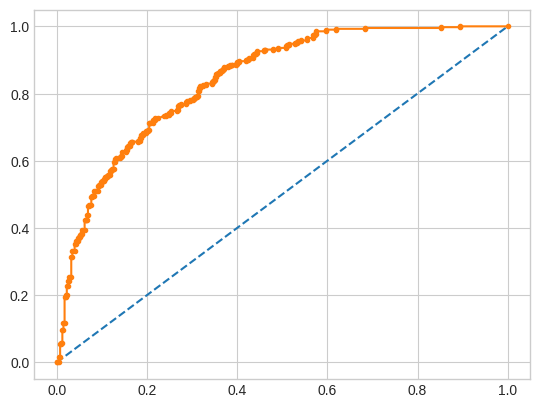

In [105]:
svm_classifier = SVM(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(trainx_res, trainy_res)

svm_classifier_predict = svm_classifier.predict(testx)

print('Accuracy_score -',accuracy_score(testy,svm_classifier_predict))
print('Mean_squared_error -',mean_squared_error(testy,svm_classifier_predict))
print('Confusion Matrix -\n',(confusion_matrix(testy,svm_classifier_predict)))
print('\nClassification_report -\n',(classification_report(testy,svm_classifier_predict)))

probs = svm_classifier.predict_proba(trainx_res)
probs = probs[:, 1]
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### 4.2. SVM using StandardScaler

Accuracy_score - 0.7532467532467533
Mean_squared_error - 0.24675324675324675
Confusion Matrix -
 [[72 23]
 [15 44]]

Classification_report -
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        95
           1       0.66      0.75      0.70        59

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154

AUC: 0.817


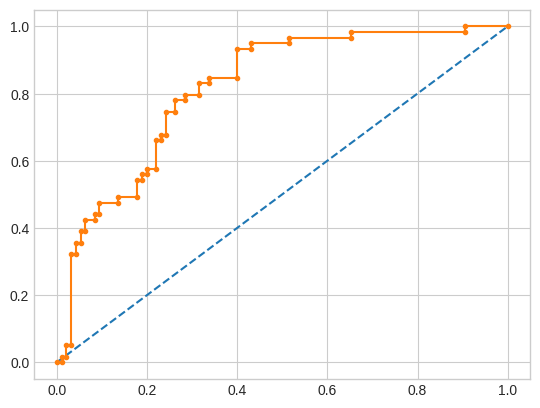

In [112]:
scaler = StandardScaler()
scaler.fit(trainx_res)
trainx_scaled = scaler.transform(trainx_res)
testx_scaled = scaler.transform(testx)
classifier = SVM(probability=True)
classifier.fit(trainx_scaled, trainy_res)
scaler_predict = classifier.predict(testx_scaled)
print('Accuracy_score -', accuracy_score(testy, scaler_predict))
print('Mean_squared_error -', mean_squared_error(testy, scaler_predict))
print('Confusion Matrix -\n', confusion_matrix(testy, scaler_predict))
print('\nClassification_report -\n', classification_report(testy, scaler_predict))
probs = classifier.predict_proba(testx_scaled)[:, 1]
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(testy, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 5. ExtraTreesClassifier

Accuracy_score - 0.7272727272727273
Mean_squared_error - 0.2727272727272727
Confusion Matrix -
 [[78 17]
 [25 34]]

Classification_report -
               precision    recall  f1-score   support

           0       0.76      0.82      0.79        95
           1       0.67      0.58      0.62        59

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.72      0.73      0.72       154

AUC: 0.817


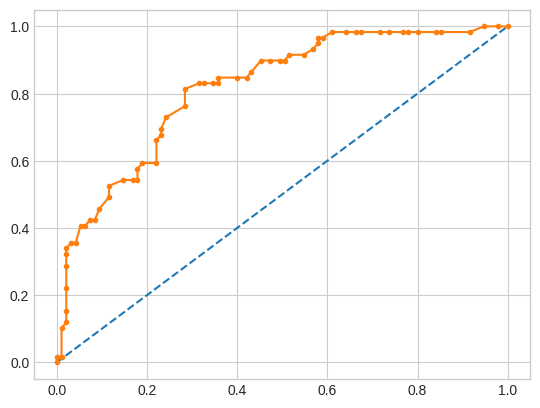

In [107]:
extra_trees_classifier = ExtraTreesClassifier(random_state=42)
extra_trees_classifier.fit(trainx_res, trainy_res)

extra_trees_predict = extra_trees_classifier.predict(testx)

print('Accuracy_score -', accuracy_score(testy, extra_trees_predict))
print('Mean_squared_error -', mean_squared_error(testy, extra_trees_predict))
print('Confusion Matrix -\n', confusion_matrix(testy, extra_trees_predict))
print('\nClassification_report -\n', classification_report(testy, extra_trees_predict))
probs = extra_trees_classifier.predict_proba(testx)[:, 1]
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(testy, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 6.GaussianNB

Accuracy_score - 0.7077922077922078
Mean_squared_error - 0.2922077922077922
Confusion Matrix -
 [[74 21]
 [24 35]]

Classification_report -
               precision    recall  f1-score   support

           0       0.76      0.78      0.77        95
           1       0.62      0.59      0.61        59

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154

AUC: 0.797


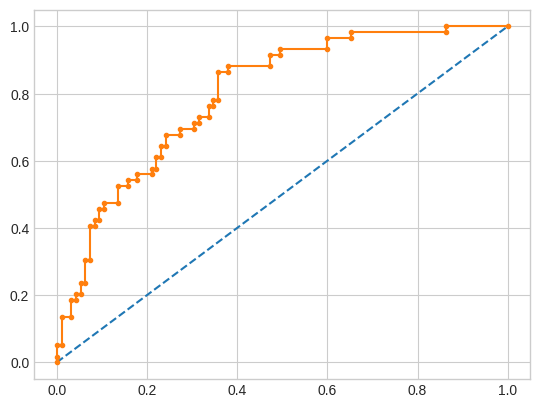

In [106]:
gaussian_nb_classifier = GaussianNB()
gaussian_nb_classifier.fit(trainx_res, trainy_res)

gaussian_nb_predict = gaussian_nb_classifier.predict(testx)

print('Accuracy_score -', accuracy_score(testy, gaussian_nb_predict))
print('Mean_squared_error -', mean_squared_error(testy, gaussian_nb_predict))
print('Confusion Matrix -\n', confusion_matrix(testy, gaussian_nb_predict))
print('\nClassification_report -\n', classification_report(testy, gaussian_nb_predict))
probs = gaussian_nb_classifier.predict_proba(testx)[:, 1]
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(testy, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 7. KNeighborsClassifier

Accuracy_score - 0.6168831168831169
Mean_squared_error - 0.38311688311688313
Confusion Matrix -
 [[60 35]
 [24 35]]

Classification_report -
               precision    recall  f1-score   support

           0       0.71      0.63      0.67        95
           1       0.50      0.59      0.54        59

    accuracy                           0.62       154
   macro avg       0.61      0.61      0.61       154
weighted avg       0.63      0.62      0.62       154

AUC: 0.685


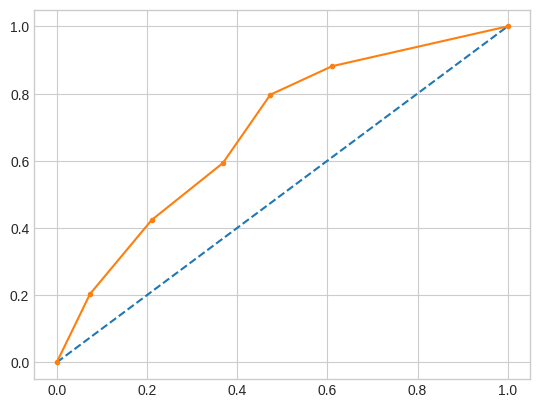

In [110]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(trainx_res, trainy_res)

knn_predict = knn_classifier.predict(testx)

print('Accuracy_score -', accuracy_score(testy, knn_predict))
print('Mean_squared_error -', mean_squared_error(testy, knn_predict))
print('Confusion Matrix -\n', confusion_matrix(testy, knn_predict))
print('\nClassification_report -\n', classification_report(testy, knn_predict))
probs = knn_classifier.predict_proba(testx)[:, 1]
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(testy, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### GridSearchCV (Hyper Parameter Tuning)

In [ ]:
# param_grid={'n_estimators':[100,400,200,300],'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_samples_split':[2,4,3],'min_samples_leaf':[1,2,3], 'max_leaf_nodes':[1,2,3],'max_samples':[2,4,3]}
# grid=GridSearchCV( estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)
# grid.fit(trainx_res,trainy_res)
# grid.best_params_

## Accuraccy Comparison of Model

In [119]:
Algorithms=[ 'LogisticRegression', 'RandomForest','RandomForest_With_HyperParam', 'DecisionTree', 'DecisionTree_With_HyperParam', 'SVM', 'SVM + Scaler', 'ExtraTrees', 'GaussianNB', 'KNeighbors' ]
Accuracy_Score=[ accuracy_score(testy,prediction), accuracy_score(testy,rf_predict), accuracy_score(testy,rf_grid_predict), accuracy_score(testy,dc_pred), accuracy_score(testy,dc_final_pred), accuracy_score(testy,svm_classifier_predict), accuracy_score(testy,scaler_predict), accuracy_score(testy,extra_trees_predict), accuracy_score(testy,gaussian_nb_predict), accuracy_score(testy,knn_predict) ]

# Create a DataFrame
accuracy_df = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': Accuracy_Score})

# Display the accuracy table
print("Accuracy Table:\n", accuracy_df)

# Find the algorithm with the highest accuracy
max_accuracy_algorithm = accuracy_df.loc[accuracy_df['Accuracy'].idxmax()]
algorithm_name = max_accuracy_algorithm['Algorithm']
accuracy_value = max_accuracy_algorithm['Accuracy']

# Format the output as expected
print(f"\n\nAmong the algorithms tested, {algorithm_name} exhibits the highest accuracy at {accuracy_value * 100:.3f}%.")


Accuracy Table:
                       Algorithm  Accuracy
0            LogisticRegression  0.720779
1                  RandomForest  0.759740
2  RandomForest_With_HyperParam  0.733766
3                  DecisionTree  0.623377
4  DecisionTree_With_HyperParam  0.688312
5                           SVM  0.746753
6                  SVM + Scaler  0.753247
7                    ExtraTrees  0.727273
8                    GaussianNB  0.707792
9                    KNeighbors  0.616883


Among the algorithms tested, RandomForest exhibits the highest accuracy at 75.974%.


## Hyper Parameter Info by each Algorithm


### 1. ExtraTreesClassifier (from `sklearn.ensemble`)
```
param_grid_extra_trees = {
    'n_estimators': [50, 100, 200],              # Number of trees
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider for the best split
    'max_depth': [None, 10, 20, 30],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],                   # Whether to bootstrap samples when building trees
    'criterion': ['gini', 'entropy']             # Function to measure the quality of a split
}
```

### 2. RandomForestClassifier (from `sklearn.ensemble`)
````
param_grid_random_forest = {
    'n_estimators': [50, 100, 200],              # Number of trees
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider for the best split
    'max_depth': [None, 10, 20, 30],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],                   # Whether to bootstrap samples when building trees
    'criterion': ['gini', 'entropy']             # Function to measure the quality of a split
}
````

### 3. DecisionTreeClassifier (from `sklearn.tree`)
```
param_grid_decision_tree = {
    'max_depth': [None, 10, 20, 30],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],            # Function to measure the quality of a split
    'splitter': ['best', 'random'],              # Strategy used to split at each node
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider for the best split
}
```

### 4. SVC (Support Vector Classifier from `sklearn.svm`)
```
param_grid_svc = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],    # Kernel function
    'C': [0.1, 1, 10, 100],                            # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1],                # Kernel coefficient (for rbf, poly, sigmoid)
    'degree': [2, 3, 4],                               # Degree of polynomial kernel
    'coef0': [0.0, 0.1, 1],                            # Independent term in kernel function (used for poly and sigmoid)
    'shrinking': [True, False],                        # Whether to use shrinking heuristic
    'class_weight': [None, 'balanced']                 # Weighting of classes
}
```

### 5. GaussianNB (Naive Bayes from `sklearn.naive_bayes`)
```
param_grid_naive_bayes = {
    # GaussianNB doesn't have many hyperparameters, but we can still tune priors
    'priors': [None, [0.5, 0.5], [0.7, 0.3]],        # Prior probabilities for each class (default is None)
}
```

### 6. StandardScaler & MinMaxScaler (from `sklearn.preprocessing`)
```
- It's not a classifier. Preprocessing Unit
- It is used to scale the features of your dataset. The features are scaled so that they have zero mean and unit variance, which is crucial for many machine learning algorithms
- These scalers don't have "hyperparameters" in the traditional sense, but you can tune them based on your data preprocessing pipeline, and combine them with models like SVM or Random Forest.

You can use scalers in a pipeline along with classifiers to ensure proper data preprocessing.
```

### 7. KNeighborsClassifier (from `sklearn.neighbors`)
```
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],                     # Number of neighbors to use for classification
    'weights': ['uniform', 'distance'],                # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute nearest neighbors
    'p': [1, 2],                                       # Power parameter for the Minkowski distance metric (1=Manhattan, 2=Euclidean)
    'leaf_size': [20, 30, 40],                         # Leaf size passed to BallTree or KDTree
}
```

### Stroring Model

In [120]:
import pickle

In [132]:
pickle.dump(rf, open( 'Diabetesmodel.pkl', 'wb'))
load_model = pickle.load(open( 'Diabetesmodel.pkl', 'rb'))

In [141]:
# Test with Input
input_data1 = (50, 50, 43.1, 33, 50, 10,15)
input_data_as_numpy_array1 = np.asarray(input_data1)
input_reshape1 = input_data_as_numpy_array1.reshape (1, -1)
prediction1 = load_model.predict(input_reshape1)
print(prediction1)

[0]
